# Methodology

- Pick more than first 10 bands and normalize to red
- Same for blue and green in next 10 bands
- Linear approach - testing
- Check once: https://www.mdpi.com/2072-4292/9/4/323 ()

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import os

import warnings
warnings.filterwarnings('ignore')

In [2]:
BX = sio.loadmat("data/X/balloons_ms")
BX

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Fri Aug 14 18:21:15 2020',
 '__version__': '1.0',
 '__globals__': [],
 'msi': array([[[0.01568627, 0.01176471, 0.00784314, ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         ...,
         [0.0627451 , 0.07843137, 0.09019608, ..., 0.01960784,
          0.01960784, 0.01568627],
         [0.0627451 , 0.0745098 , 0.09411765, ..., 0.01960784,
          0.01960784, 0.01960784],
         [0.0627451 , 0.0745098 , 0.09019608, ..., 0.01960784,
          0.01960784, 0.01568627]],
 
        [[0.01568627, 0.01176471, 0.00784314, ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.02352941, 0.        ],
         [0.        , 0.        , 0.        , ..., 0.   

In [4]:
ballon_arr = BX['msi']

In [5]:
ballon_arr.shape

(512, 512, 31)

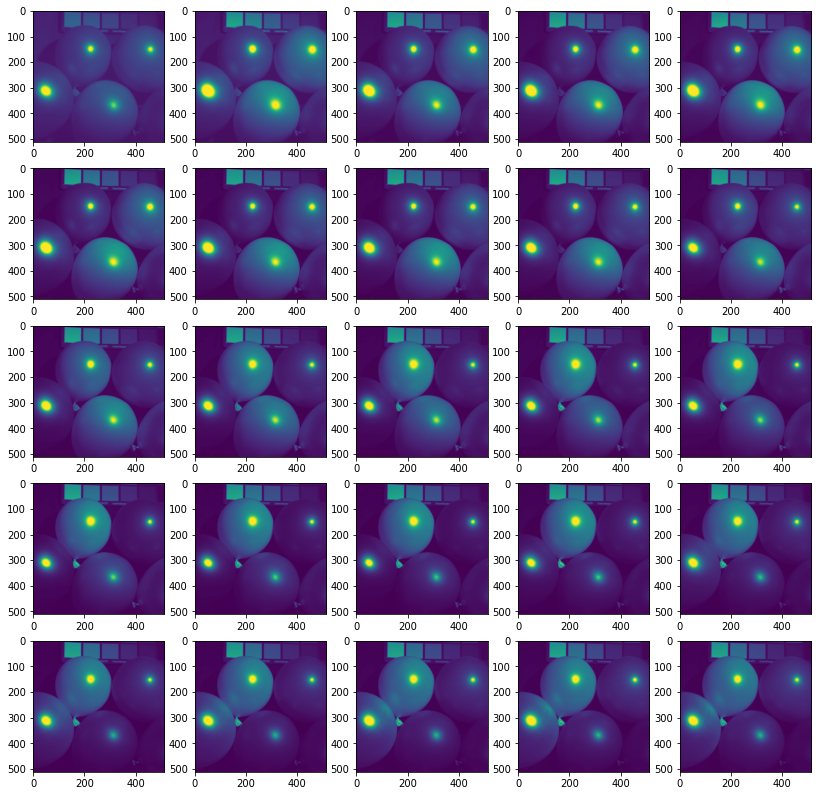

In [6]:
plt.figure(figsize=(14,14))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(ballon_arr[:,:,i])

## Visualization technique for Multispectral Imaging

In [7]:
ballon_arr.shape

(512, 512, 31)

Text(0.5, 1.0, '(512, 512)')

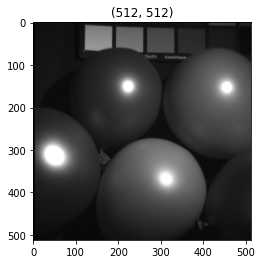

In [8]:
band1 = ballon_arr[:,:,1]
plt.imshow(band1,cmap="gray")
plt.title(band1.shape)

In [9]:
from PIL import Image

In [10]:
gray_img = []
for band in range(1,31):
    globals()['band{}'.format(band)] = ballon_arr[:,:,band]
    current_band = globals()['band{}'.format(band)]
    #print(current_band)
    current_band = (current_band - np.min(current_band)) * (255.0 / (np.max(current_band) - np.min(current_band)))
    current_band = current_band.astype(np.uint8)
    #print(current_band.shape)
    img_arr = Image.fromarray(current_band,mode="L")
    gray_img.append(img_arr)

In [11]:
len(gray_img)

30

In [12]:
rgb_bands = []
for img in gray_img:
    rgb_image = img.convert("RGB")

    r, g, b = rgb_image.split()
 
    rgb_bands.extend([r, g, b])

In [13]:
len(rgb_bands)

90

In [18]:
image_data = np.clip(ballon_arr, a_min=0, a_max=None)

In [19]:
image_data.shape

(512, 512, 31)

In [20]:
image_data = np.interp(image_data, (image_data.min(), image_data.max()), (0, 1))

In [21]:
image_data.shape

(512, 512, 31)

In [22]:
composite_image = np.stack((image_data[:, :, 10], image_data[:, :, 20], image_data[:, :, 30]), axis=-1)
composite_image.shape

(512, 512, 3)

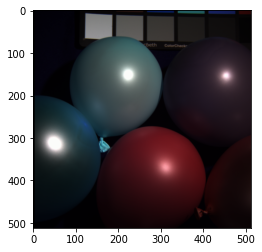

In [23]:
plt.imshow(composite_image) #BGR

In [99]:
red_channel = ballon_arr[:, :, :10]
green_channel = ballon_arr[:, :, 10:20]
blue_channel = ballon_arr[:, :, 20:30]

In [100]:
red_channel = ((red_channel - red_channel.min()) / (red_channel.max() - red_channel.min())) * 255
green_channel = ((green_channel - green_channel.min()) / (green_channel.max() - green_channel.min())) * 255
blue_channel = ((blue_channel - blue_channel.min()) / (blue_channel.max() - blue_channel.min())) * 255

In [101]:
rgb_image = np.stack((red_channel, green_channel, blue_channel), axis=2).astype(np.uint8)

In [102]:
rgb_image.shape

(512, 512, 3, 10)

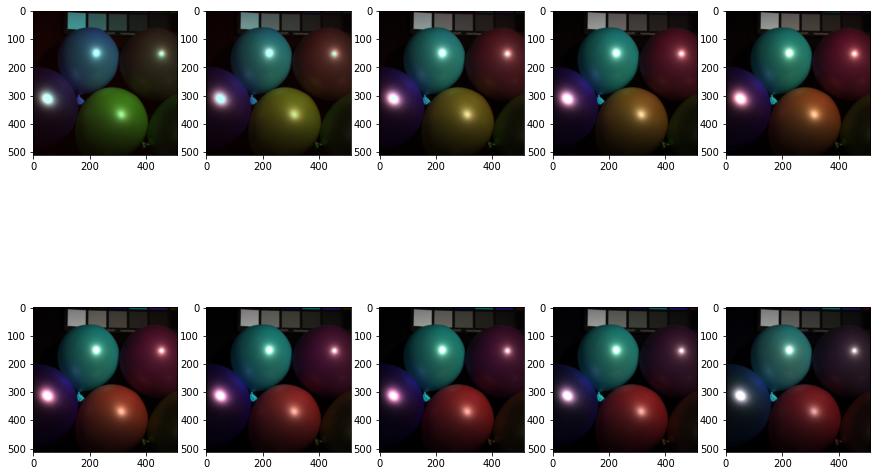

In [103]:
plt.figure(figsize=(15,10))
for i in range(1,11):
    plt.subplot(2,5,i)
    plt.imshow(rgb_image[:,:,:,i-1])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


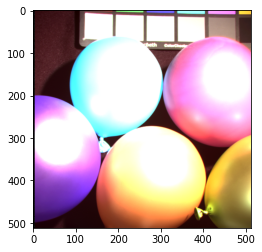

In [107]:
plt.imshow(np.sum(rgb_image, axis=3))

In [24]:
BY = sio.loadmat("data/Y/balloons_ms")
BY

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Fri Aug 14 18:21:16 2020',
 '__version__': '1.0',
 '__globals__': [],
 'RGB': array([[[ 0.02447842,  0.01791324,  0.02691897],
         [ 0.        ,  0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        ],
         ...,
         [ 0.05814174,  0.19803948,  0.25563212],
         [ 0.04688011,  0.18706383,  0.25746273],
         [ 0.04637326,  0.1852436 ,  0.25456683]],
 
        [[ 0.02447842,  0.01791324,  0.02691897],
         [-0.02978571, -0.01084189, -0.02645626],
         [ 0.06032346,  0.07218141,  0.045712  ],
         ...,
         [ 0.08793674,  0.24579282,  0.30333112],
         [ 0.08313243,  0.22396824,  0.30287638],
         [ 0.06214562,  0.20873467,  0.28322184]],
 
        [[ 0.02447842,  0.01791324,  0.02691897],
         [ 0.04518796,  0.02292117,  0.00737346],
         [ 0.0141812 ,  0.02992537,  0.02248635],
         ...,
         [ 0.07451954,  0.22955314,  0.308845  ],
         

In [37]:
ballon_y = BY['RGB']

In [38]:
ballon_y.shape

(512, 512, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


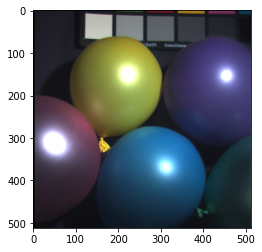

In [39]:
plt.imshow(ballon_y)

In [33]:
BZ = sio.loadmat("data/Z/balloons_ms")
BZ

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Fri Aug 14 18:21:16 2020',
 '__version__': '1.0',
 '__globals__': [],
 'Zmsi': array([[[0.05890012, 0.04076287, 0.02213159, ..., 0.01020987,
          0.01555607, 0.02733609],
         [0.07068015, 0.04925322, 0.0271561 , ..., 0.01292892,
          0.02003676, 0.03563879],
         [0.06867341, 0.04827282, 0.02725567, ..., 0.01365273,
          0.02068398, 0.0363511 ],
         ...,
         [0.08254059, 0.08986673, 0.1009689 , ..., 0.12860754,
          0.12717525, 0.12511489],
         [0.07383578, 0.07909007, 0.0887523 , ..., 0.10595512,
          0.10495941, 0.10293735],
         [0.04737286, 0.04782858, 0.05156633, ..., 0.01882659,
          0.0186466 , 0.01834406]],
 
        [[0.0640625 , 0.04528952, 0.02525276, ..., 0.01242341,
          0.01886872, 0.03274357],
         [0.07632123, 0.05444623, 0.03093214, ..., 0.01590074,
          0.02421875, 0.04237515],
         [0.07052696, 0.05055147, 0.02878753, ..., 0.01

In [34]:
ballon_z = BZ['Zmsi']
ballon_z.shape

(16, 16, 31)

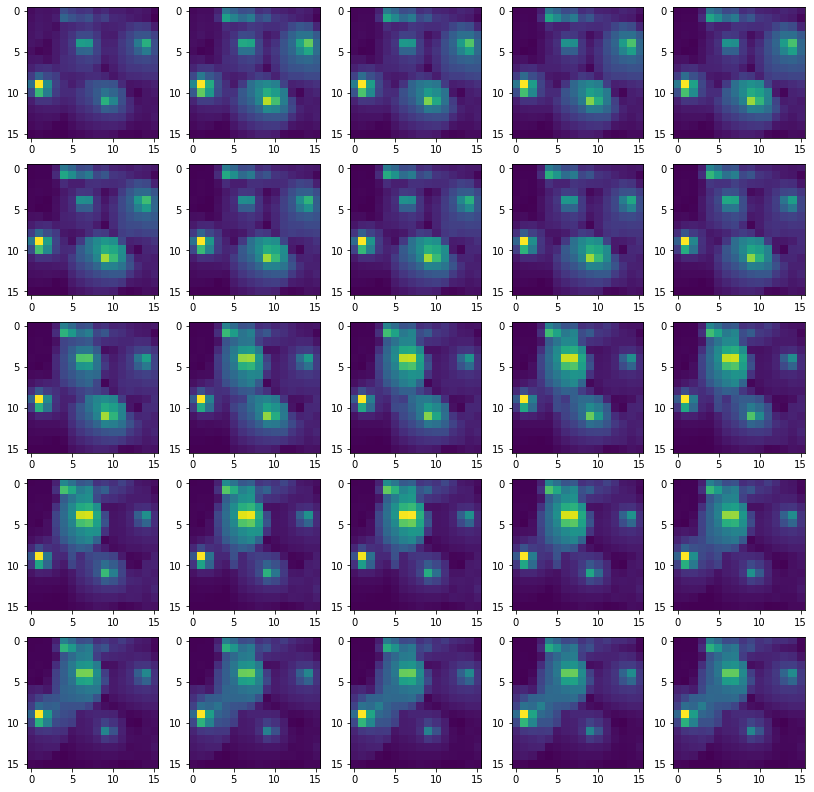

In [35]:
plt.figure(figsize=(14,14))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(ballon_z[:,:,i])